# PROJECT| Intro to Neural Networks

##### Data Description: Given a Bank customer, can we build a classifier that can determine whether they will leave or not using Neural networks?


The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Know your data: https://www.kaggle.com/barelydedicated/bank- customer-churn-modeling.

Context: Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### 1. Read the Data Set

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')


In [57]:
df = pd.read_csv('Churn_Modelling.csv')

In [8]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.shape

(10000, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

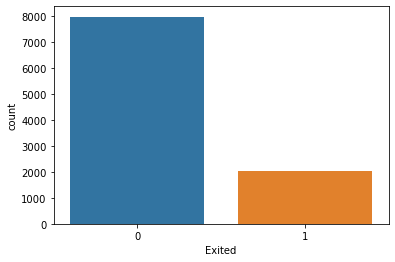

In [58]:
sns.countplot(x="Exited", data=df)

###### class imbalance

### 2. Drop the columns which are unique for all users like IDs (2.5 points)

In [12]:


df.drop(labels = ['RowNumber','CustomerId','Surname'],axis=1,inplace = True)

In [13]:
df.shape

(10000, 11)

In [14]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


### 3. Distinguish the feature and target set (2.5 points)

In [15]:
X = df.iloc[:,0:10]
y = df['Exited']

In [16]:
#Selecting columns of "object" datatype
for featurecolumn in X.columns: # Loop through all columns in the dataframe
   if X[featurecolumn].dtype == 'object':
    print(featurecolumn)

Geography
Gender


In [17]:
X.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58


In [18]:
X.shape

(10000, 10)

In [19]:
X1 = pd.get_dummies(X, columns=['Geography', 'Gender'])

In [20]:
X1.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0


In [21]:
X1.shape

(10000, 13)

### 4.  Divide the data set into training and test sets ( 2.5 points) 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=.20, random_state= 1)

In [23]:
X_train.shape

(8000, 13)

In [24]:
X_test.shape

(2000, 13)

### 5. Normalize the train and test data (5 points)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 6. Initialize & build the model (10 points)

In [27]:
import keras
from keras.models import Sequential #Helps you build the NN
from keras.layers import Dense # Takes care of randomly initialized weights


In [28]:
classifier = Sequential()

In [29]:
# Add Input layer to the model
classifier.add(Dense(7, input_shape=(13,), activation='relu'))    #13 features

# Hidden layers
classifier.add(Dense(6, activation='relu'))
classifier.add(Dense(1, activation='relu'))

#Compile Model
classifier.compile(optimizer = 'adam' ,loss = 'binary_crossentropy', metrics = ['accuracy'] )


In [30]:
#Fit Model & Prediction

classifier.fit(X_train, y_train, batch_size=30, epochs=30)

Epoch 1/30
8000/8000 [==============================] - 1s 149us/step - loss: 2.1725 - accuracy: 0.7686
Epoch 2/30
8000/8000 [==============================] - 1s 114us/step - loss: 1.6042 - accuracy: 0.7666
Epoch 3/30
8000/8000 [==============================] - 1s 88us/step - loss: 1.1697 - accuracy: 0.7676
Epoch 4/30
8000/8000 [==============================] - 1s 86us/step - loss: 0.8693 - accuracy: 0.7740 0s - loss: 0.9
Epoch 5/30
8000/8000 [==============================] - 1s 78us/step - loss: 0.7161 - accuracy: 0.7772
Epoch 6/30
8000/8000 [==============================] - 1s 129us/step - loss: 0.6176 - accuracy: 0.7878
Epoch 7/30
8000/8000 [==============================] - 1s 149us/step - loss: 0.5400 - accuracy: 0.7891
Epoch 8/30
8000/8000 [==============================] - 1s 87us/step - loss: 0.5144 - accuracy: 0.7999
Epoch 9/30
8000/8000 [==============================] - 1s 78us/step - loss: 0.4942 - accuracy: 0.8066
Epoch 10/30
8000/8000 [==============================]

### 7.  Predict the results using 0.5 as a threshold (5 points)


In [31]:

#predict the NN with the Test set and check for accuracy.
y_pred = classifier.predict(X_test)

In [32]:
y_pred = y_pred>0.5


In [ ]:
y_pred

### 8. Print the Accuracy score and confusion matrix (2.5 points)

In [34]:
from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(y_test,y_pred)

In [35]:
confMatrix


array([[1548,   37],
       [ 260,  155]], dtype=int64)

In [36]:

#Returns the loss value & metrics values for the model in test mode.
score = classifier.evaluate(X_test,y_test)
print("Accuracy score : ",score)


2000/2000 [==============================] - 0s 50us/step
Accuracy score :  [0.42115921807289125, 0.8489999771118164]


In [37]:
# Creating a function to report confusion metrics
def confusion_metrics (confMatrix):
# save confusion matrix and slice into four pieces
    TP = confMatrix[1][1]
    TN = confMatrix[0][0]
    FP = confMatrix[0][1]
    FN = confMatrix[1][0]
    print("Neural Network Classification report :\n")
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')   
    
confusion_metrics (confMatrix)

Neural Network Classification report :

True Positives: 155
True Negatives: 1548
False Positives: 37
False Negatives: 260
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.37
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.54


## Tuning of parameters using K-Fold Crossvalidation

In [42]:
def build_classifier(optimizer) :
    classifier_1 = Sequential()
    classifier_1.add(Dense(7, input_shape=(13,), activation='relu'))
    classifier_1.add(Dense(6, activation='relu'))
    classifier_1.add(Dense(1, activation='relu'))
    classifier_1.compile(optimizer = 'adam' ,loss = 'binary_crossentropy', metrics = ['accuracy'] )
    classifier_1.fit(X_train, y_train, batch_size=30, epochs=30)
    
    
    return classifier

In [43]:
classifier_1 = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_classifier)


In [49]:
#Tuning of parameters using K-Fold Crossvalidation


from sklearn.model_selection import GridSearchCV
parameters={'batch_size':[25,32],'nb_epoch':[30,50],'optimizer':['adam','rmsprop']}
grid_Search=GridSearchCV(estimator=classifier_1,param_grid=parameters,scoring='accuracy',cv=10) #use gridsearch to find the best parameters from speceied list.
grid_search=grid_Search.fit(X_train,y_train)
best_param=grid_search.best_params_
best_accu=grid_search.best_score_

Epoch 1/30
8000/8000 [==============================] - 1s 109us/step - loss: 3.4882 - accuracy: 0.5596
Epoch 2/30
8000/8000 [==============================] - 1s 87us/step - loss: 2.3818 - accuracy: 0.6785
Epoch 3/30
8000/8000 [==============================] - 1s 88us/step - loss: 2.0889 - accuracy: 0.6678
Epoch 4/30
8000/8000 [==============================] - 1s 82us/step - loss: 1.7142 - accuracy: 0.6734
Epoch 5/30
8000/8000 [==============================] - 1s 86us/step - loss: 1.3551 - accuracy: 0.7155
Epoch 6/30
8000/8000 [==============================] - 1s 99us/step - loss: 1.0767 - accuracy: 0.7358 0s - los
Epoch 7/30
8000/8000 [==============================] - 1s 97us/step - loss: 0.9207 - accuracy: 0.7433
Epoch 8/30
8000/8000 [==============================] - 1s 97us/step - loss: 0.8016 - accuracy: 0.7561
Epoch 9/30
8000/8000 [==============================] - 1s 83us/step - loss: 0.7600 - accuracy: 0.7724
Epoch 10/30
8000/8000 [==============================] - 1s 82u

8000/8000 [==============================] - 1s 76us/step - loss: 0.4315 - accuracy: 0.8148
Epoch 17/30
8000/8000 [==============================] - 1s 119us/step - loss: 0.4283 - accuracy: 0.8140
Epoch 18/30
8000/8000 [==============================] - 1s 116us/step - loss: 0.4269 - accuracy: 0.8140
Epoch 19/30
8000/8000 [==============================] - 1s 158us/step - loss: 0.4210 - accuracy: 0.8180
Epoch 20/30
8000/8000 [==============================] - 1s 124us/step - loss: 0.4149 - accuracy: 0.8185
Epoch 21/30
8000/8000 [==============================] - 1s 73us/step - loss: 0.4102 - accuracy: 0.8201
Epoch 22/30
8000/8000 [==============================] - 1s 70us/step - loss: 0.4088 - accuracy: 0.8180
Epoch 23/30
8000/8000 [==============================] - 1s 96us/step - loss: 0.4011 - accuracy: 0.8246
Epoch 24/30
8000/8000 [==============================] - 1s 97us/step - loss: 0.3983 - accuracy: 0.8275
Epoch 25/30
8000/8000 [==============================] - 1s 94us/step - 

8000/8000 [==============================] - 1s 100us/step - loss: 1.4133 - accuracy: 0.7421
Epoch 2/30
8000/8000 [==============================] - 1s 71us/step - loss: 0.7933 - accuracy: 0.7632
Epoch 3/30
8000/8000 [==============================] - 1s 84us/step - loss: 0.5865 - accuracy: 0.7736
Epoch 4/30
8000/8000 [==============================] - 1s 86us/step - loss: 0.5406 - accuracy: 0.7784
Epoch 5/30
8000/8000 [==============================] - 1s 86us/step - loss: 0.5260 - accuracy: 0.7821
Epoch 6/30
8000/8000 [==============================] - 1s 159us/step - loss: 0.5108 - accuracy: 0.7860
Epoch 7/30
8000/8000 [==============================] - 1s 105us/step - loss: 0.4967 - accuracy: 0.7916
Epoch 8/30
8000/8000 [==============================] - 1s 87us/step - loss: 0.4920 - accuracy: 0.7944
Epoch 9/30
8000/8000 [==============================] - 1s 87us/step - loss: 0.4804 - accuracy: 0.7965
Epoch 10/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.4

8000/8000 [==============================] - 1s 123us/step - loss: 0.4199 - accuracy: 0.8316
Epoch 18/30
8000/8000 [==============================] - 1s 75us/step - loss: 0.4155 - accuracy: 0.8328
Epoch 19/30
8000/8000 [==============================] - 1s 68us/step - loss: 0.4169 - accuracy: 0.8369
Epoch 20/30
8000/8000 [==============================] - 1s 67us/step - loss: 0.4604 - accuracy: 0.8301
Epoch 21/30
8000/8000 [==============================] - 1s 68us/step - loss: 0.4298 - accuracy: 0.8388
Epoch 22/30
8000/8000 [==============================] - 1s 82us/step - loss: 0.4220 - accuracy: 0.8389
Epoch 23/30
8000/8000 [==============================] - 1s 72us/step - loss: 0.4168 - accuracy: 0.8418
Epoch 24/30
8000/8000 [==============================] - 1s 68us/step - loss: 0.4193 - accuracy: 0.8399
Epoch 25/30
8000/8000 [==============================] - 1s 73us/step - loss: 0.4603 - accuracy: 0.7955
Epoch 26/30
8000/8000 [==============================] - 1s 69us/step - los

8000/8000 [==============================] - 1s 90us/step - loss: 1.4177 - accuracy: 0.7211
Epoch 3/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.8241 - accuracy: 0.7567
Epoch 4/30
8000/8000 [==============================] - 1s 89us/step - loss: 0.7446 - accuracy: 0.7742
Epoch 5/30
8000/8000 [==============================] - 1s 98us/step - loss: 0.6768 - accuracy: 0.7826
Epoch 6/30
8000/8000 [==============================] - 1s 84us/step - loss: 0.6366 - accuracy: 0.7868
Epoch 7/30
8000/8000 [==============================] - 1s 95us/step - loss: 0.6090 - accuracy: 0.7903
Epoch 8/30
8000/8000 [==============================] - 1s 80us/step - loss: 0.5822 - accuracy: 0.7925
Epoch 9/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.5504 - accuracy: 0.7956
Epoch 10/30
8000/8000 [==============================] - 1s 90us/step - loss: 0.5310 - accuracy: 0.7968
Epoch 11/30
8000/8000 [==============================] - 1s 96us/step - loss: 0.513

8000/8000 [==============================] - 1s 71us/step - loss: 0.4773 - accuracy: 0.8011
Epoch 19/30
8000/8000 [==============================] - 1s 97us/step - loss: 0.4729 - accuracy: 0.8008
Epoch 20/30
8000/8000 [==============================] - 1s 113us/step - loss: 0.4690 - accuracy: 0.8035
Epoch 21/30
8000/8000 [==============================] - 1s 70us/step - loss: 0.4692 - accuracy: 0.8075
Epoch 22/30
8000/8000 [==============================] - 1s 72us/step - loss: 0.4655 - accuracy: 0.8076
Epoch 23/30
8000/8000 [==============================] - 1s 71us/step - loss: 0.4643 - accuracy: 0.8099
Epoch 24/30
8000/8000 [==============================] - 1s 71us/step - loss: 0.4635 - accuracy: 0.8090
Epoch 25/30
8000/8000 [==============================] - 1s 72us/step - loss: 0.4618 - accuracy: 0.8110
Epoch 26/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.4610 - accuracy: 0.8121
Epoch 27/30
8000/8000 [==============================] - 1s 114us/step - lo

8000/8000 [==============================] - 1s 87us/step - loss: 0.9595 - accuracy: 0.7895
Epoch 4/30
8000/8000 [==============================] - 1s 97us/step - loss: 0.8079 - accuracy: 0.7861
Epoch 5/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.7425 - accuracy: 0.7919
Epoch 6/30
8000/8000 [==============================] - 1s 89us/step - loss: 0.6547 - accuracy: 0.7886
Epoch 7/30
8000/8000 [==============================] - 1s 103us/step - loss: 0.6237 - accuracy: 0.7971
Epoch 8/30
8000/8000 [==============================] - 1s 101us/step - loss: 0.5967 - accuracy: 0.7981
Epoch 9/30
8000/8000 [==============================] - 1s 82us/step - loss: 0.5712 - accuracy: 0.7983
Epoch 10/30
8000/8000 [==============================] - 1s 87us/step - loss: 0.5523 - accuracy: 0.8012
Epoch 11/30
8000/8000 [==============================] - 1s 70us/step - loss: 0.5374 - accuracy: 0.8036
Epoch 12/30
8000/8000 [==============================] - 1s 68us/step - loss: 0.

Epoch 20/30
8000/8000 [==============================] - 1s 81us/step - loss: 0.4689 - accuracy: 0.7970
Epoch 21/30
8000/8000 [==============================] - 1s 81us/step - loss: 0.4675 - accuracy: 0.7968
Epoch 22/30
8000/8000 [==============================] - 1s 77us/step - loss: 0.4650 - accuracy: 0.7976
Epoch 23/30
8000/8000 [==============================] - 1s 86us/step - loss: 0.4612 - accuracy: 0.7975
Epoch 24/30
8000/8000 [==============================] - 1s 85us/step - loss: 0.4623 - accuracy: 0.7981 0s - loss:
Epoch 25/30
8000/8000 [==============================] - ETA: 0s - loss: 0.4598 - accuracy: 0.79 - 1s 81us/step - loss: 0.4590 - accuracy: 0.7991
Epoch 26/30
8000/8000 [==============================] - 1s 83us/step - loss: 0.4590 - accuracy: 0.7995
Epoch 27/30
8000/8000 [==============================] - 1s 86us/step - loss: 0.4539 - accuracy: 0.8023
Epoch 28/30
8000/8000 [==============================] - 1s 96us/step - loss: 0.4533 - accuracy: 0.8024
Epoch 29/30

8000/8000 [==============================] - 1s 75us/step - loss: 1.0416 - accuracy: 0.7509
Epoch 6/30
8000/8000 [==============================] - 1s 71us/step - loss: 0.9378 - accuracy: 0.7632
Epoch 7/30
8000/8000 [==============================] - 1s 70us/step - loss: 0.8160 - accuracy: 0.7779
Epoch 8/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.6693 - accuracy: 0.7851
Epoch 9/30
8000/8000 [==============================] - 1s 94us/step - loss: 0.6058 - accuracy: 0.7921
Epoch 10/30
8000/8000 [==============================] - 1s 92us/step - loss: 0.5783 - accuracy: 0.7972
Epoch 11/30
8000/8000 [==============================] - 1s 93us/step - loss: 0.5193 - accuracy: 0.7914
Epoch 12/30
8000/8000 [==============================] - 1s 86us/step - loss: 0.4998 - accuracy: 0.8016
Epoch 13/30
8000/8000 [==============================] - 1s 86us/step - loss: 0.4902 - accuracy: 0.8081
Epoch 14/30
8000/8000 [==============================] - 1s 83us/step - loss: 0.

8000/8000 [==============================] - 1s 91us/step - loss: 0.4866 - accuracy: 0.7960
Epoch 22/30
8000/8000 [==============================] - 1s 77us/step - loss: 0.4847 - accuracy: 0.7975
Epoch 23/30
8000/8000 [==============================] - 1s 80us/step - loss: 0.4745 - accuracy: 0.7983
Epoch 24/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.4680 - accuracy: 0.7987
Epoch 25/30
8000/8000 [==============================] - 1s 83us/step - loss: 0.4614 - accuracy: 0.8000
Epoch 26/30
8000/8000 [==============================] - 1s 97us/step - loss: 0.4550 - accuracy: 0.8035
Epoch 27/30
8000/8000 [==============================] - 1s 95us/step - loss: 0.4534 - accuracy: 0.8043
Epoch 28/30
8000/8000 [==============================] - 1s 94us/step - loss: 0.4426 - accuracy: 0.8085
Epoch 29/30
8000/8000 [==============================] - 1s 80us/step - loss: 0.4370 - accuracy: 0.8150
Epoch 30/30
8000/8000 [==============================] - 1s 80us/step - loss

8000/8000 [==============================] - 1s 69us/step - loss: 0.5389 - accuracy: 0.7914
Epoch 7/30
8000/8000 [==============================] - 1s 71us/step - loss: 0.5325 - accuracy: 0.7935
Epoch 8/30
8000/8000 [==============================] - 1s 74us/step - loss: 0.5264 - accuracy: 0.7949
Epoch 9/30
8000/8000 [==============================] - 1s 71us/step - loss: 0.5218 - accuracy: 0.7954
Epoch 10/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.5155 - accuracy: 0.7966
Epoch 11/30
8000/8000 [==============================] - 1s 70us/step - loss: 0.5124 - accuracy: 0.7984
Epoch 12/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.5040 - accuracy: 0.7981
Epoch 13/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.4944 - accuracy: 0.7995
Epoch 14/30
8000/8000 [==============================] - 1s 71us/step - loss: 0.4845 - accuracy: 0.8002
Epoch 15/30
8000/8000 [==============================] - 1s 68us/step - loss: 0

8000/8000 [==============================] - 1s 76us/step - loss: 0.4180 - accuracy: 0.8330
Epoch 23/30
8000/8000 [==============================] - 1s 88us/step - loss: 0.4078 - accuracy: 0.8340
Epoch 24/30
8000/8000 [==============================] - 1s 86us/step - loss: 0.4031 - accuracy: 0.8315
Epoch 25/30
8000/8000 [==============================] - 1s 84us/step - loss: 0.4032 - accuracy: 0.8345
Epoch 26/30
8000/8000 [==============================] - 1s 83us/step - loss: 0.4000 - accuracy: 0.8382
Epoch 27/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.4010 - accuracy: 0.8413
Epoch 28/30
8000/8000 [==============================] - 1s 71us/step - loss: 0.4310 - accuracy: 0.8386
Epoch 29/30
8000/8000 [==============================] - 1s 88us/step - loss: 0.4146 - accuracy: 0.8396
Epoch 30/30
8000/8000 [==============================] - 1s 74us/step - loss: 0.4035 - accuracy: 0.8397
Epoch 1/1
7200/7200 [==============================] - 1s 108us/step - loss:

8000/8000 [==============================] - 1s 83us/step - loss: 0.4974 - accuracy: 0.8081
Epoch 8/30
8000/8000 [==============================] - 1s 82us/step - loss: 0.4878 - accuracy: 0.8119
Epoch 9/30
8000/8000 [==============================] - 1s 80us/step - loss: 0.4857 - accuracy: 0.8133
Epoch 10/30
8000/8000 [==============================] - 1s 80us/step - loss: 0.4827 - accuracy: 0.8133
Epoch 11/30
8000/8000 [==============================] - 1s 82us/step - loss: 0.4812 - accuracy: 0.8135
Epoch 12/30
8000/8000 [==============================] - 1s 80us/step - loss: 0.4715 - accuracy: 0.8142
Epoch 13/30
8000/8000 [==============================] - 1s 80us/step - loss: 0.4554 - accuracy: 0.8151
Epoch 14/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.4537 - accuracy: 0.8138 0s - loss: 0
Epoch 15/30
8000/8000 [==============================] - 1s 98us/step - loss: 0.4522 - accuracy: 0.8158
Epoch 16/30
8000/8000 [==============================] - 1s 95us/

8000/8000 [==============================] - 1s 67us/step - loss: 0.3873 - accuracy: 0.8371
Epoch 24/30
8000/8000 [==============================] - 1s 66us/step - loss: 0.3832 - accuracy: 0.8378
Epoch 25/30
8000/8000 [==============================] - 1s 66us/step - loss: 0.3828 - accuracy: 0.8405
Epoch 26/30
8000/8000 [==============================] - 1s 66us/step - loss: 0.3811 - accuracy: 0.8395
Epoch 27/30
8000/8000 [==============================] - 1s 102us/step - loss: 0.3793 - accuracy: 0.8397
Epoch 28/30
8000/8000 [==============================] - 1s 93us/step - loss: 0.3797 - accuracy: 0.8397
Epoch 29/30
8000/8000 [==============================] - 1s 97us/step - loss: 0.3821 - accuracy: 0.8397
Epoch 30/30
8000/8000 [==============================] - 1s 90us/step - loss: 0.3799 - accuracy: 0.8409
Epoch 1/1
7200/7200 [==============================] - 1s 104us/step - loss: 0.3462 - accuracy: 0.8533
Epoch 1/30
8000/8000 [==============================] - 1s 100us/step - loss

8000/8000 [==============================] - 1s 85us/step - loss: 0.4432 - accuracy: 0.8079
Epoch 9/30
8000/8000 [==============================] - 1s 116us/step - loss: 0.4339 - accuracy: 0.8133
Epoch 10/30
8000/8000 [==============================] - 1s 113us/step - loss: 0.4276 - accuracy: 0.8149
Epoch 11/30
8000/8000 [==============================] - 1s 109us/step - loss: 0.4214 - accuracy: 0.8155
Epoch 12/30
8000/8000 [==============================] - 1s 78us/step - loss: 0.4183 - accuracy: 0.8146
Epoch 13/30
8000/8000 [==============================] - 1s 68us/step - loss: 0.4137 - accuracy: 0.8144
Epoch 14/30
8000/8000 [==============================] - 1s 72us/step - loss: 0.4095 - accuracy: 0.8175
Epoch 15/30
8000/8000 [==============================] - 1s 72us/step - loss: 0.4054 - accuracy: 0.8201
Epoch 16/30
8000/8000 [==============================] - 1s 78us/step - loss: 0.4016 - accuracy: 0.8225
Epoch 17/30
8000/8000 [==============================] - 1s 77us/step - lo

8000/8000 [==============================] - 1s 78us/step - loss: 0.5555 - accuracy: 0.7861
Epoch 25/30
8000/8000 [==============================] - 1s 160us/step - loss: 0.5426 - accuracy: 0.7899
Epoch 26/30
8000/8000 [==============================] - 1s 103us/step - loss: 0.5317 - accuracy: 0.7946
Epoch 27/30
8000/8000 [==============================] - 1s 111us/step - loss: 0.5270 - accuracy: 0.7949
Epoch 28/30
8000/8000 [==============================] - 1s 94us/step - loss: 0.5210 - accuracy: 0.7984
Epoch 29/30
8000/8000 [==============================] - 1s 71us/step - loss: 0.5090 - accuracy: 0.7989
Epoch 30/30
8000/8000 [==============================] - 1s 77us/step - loss: 0.5163 - accuracy: 0.7857
Epoch 1/1
7200/7200 [==============================] - 1s 78us/step - loss: 0.3465 - accuracy: 0.8493
Epoch 1/30
8000/8000 [==============================] - 1s 90us/step - loss: 1.5703 - accuracy: 0.7891
Epoch 2/30
8000/8000 [==============================] - 1s 67us/step - loss:

8000/8000 [==============================] - 1s 76us/step - loss: 0.5043 - accuracy: 0.7991
Epoch 10/30
8000/8000 [==============================] - 1s 77us/step - loss: 0.4844 - accuracy: 0.8011
Epoch 11/30
8000/8000 [==============================] - 1s 89us/step - loss: 0.4792 - accuracy: 0.8036
Epoch 12/30
8000/8000 [==============================] - 1s 95us/step - loss: 0.4746 - accuracy: 0.8045
Epoch 13/30
8000/8000 [==============================] - 1s 106us/step - loss: 0.4675 - accuracy: 0.8070
Epoch 14/30
8000/8000 [==============================] - 1s 119us/step - loss: 0.4617 - accuracy: 0.8086
Epoch 15/30
8000/8000 [==============================] - 1s 82us/step - loss: 0.4566 - accuracy: 0.8087
Epoch 16/30
8000/8000 [==============================] - 1s 95us/step - loss: 0.4531 - accuracy: 0.8116
Epoch 17/30
8000/8000 [==============================] - 1s 81us/step - loss: 0.4466 - accuracy: 0.8112
Epoch 18/30
8000/8000 [==============================] - 1s 83us/step - lo

8000/8000 [==============================] - 1s 101us/step - loss: 0.4149 - accuracy: 0.8239
Epoch 26/30
8000/8000 [==============================] - 1s 105us/step - loss: 0.4221 - accuracy: 0.8245
Epoch 27/30
8000/8000 [==============================] - 1s 109us/step - loss: 0.4048 - accuracy: 0.8292
Epoch 28/30
8000/8000 [==============================] - 1s 95us/step - loss: 0.4048 - accuracy: 0.8306
Epoch 29/30
8000/8000 [==============================] - 1s 86us/step - loss: 0.3997 - accuracy: 0.8350
Epoch 30/30
8000/8000 [==============================] - 1s 84us/step - loss: 0.3930 - accuracy: 0.8370
Epoch 1/1
7200/7200 [==============================] - 1s 77us/step - loss: 0.3378 - accuracy: 0.8501
Epoch 1/30
8000/8000 [==============================] - 1s 102us/step - loss: 2.0201 - accuracy: 0.7703
Epoch 2/30
8000/8000 [==============================] - 1s 87us/step - loss: 1.2119 - accuracy: 0.7722
Epoch 3/30
8000/8000 [==============================] - 1s 97us/step - loss:

Epoch 11/30
8000/8000 [==============================] - 1s 82us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 12/30
8000/8000 [==============================] - 1s 117us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 13/30
8000/8000 [==============================] - 1s 95us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 14/30
8000/8000 [==============================] - 1s 77us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 15/30
8000/8000 [==============================] - 1s 76us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 16/30
8000/8000 [==============================] - 1s 76us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 17/30
8000/8000 [==============================] - 1s 76us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 18/30
8000/8000 [==============================] - 1s 77us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 19/30
8000/8000 [==============================] - 1s 109us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 20/30
8000/8000 [==============================] - 1s 85

8000/8000 [==============================] - 1s 80us/step - loss: 0.3811 - accuracy: 0.8401
Epoch 28/30
8000/8000 [==============================] - 1s 77us/step - loss: 0.3839 - accuracy: 0.8413
Epoch 29/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.3761 - accuracy: 0.8471
Epoch 30/30
8000/8000 [==============================] - 1s 77us/step - loss: 0.3702 - accuracy: 0.8486
Epoch 1/1
7200/7200 [==============================] - 1s 77us/step - loss: 0.3389 - accuracy: 0.8515
Epoch 1/30
8000/8000 [==============================] - 1s 109us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 2/30
8000/8000 [==============================] - 1s 81us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 3/30
8000/8000 [==============================] - 1s 87us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 4/30
8000/8000 [==============================] - 1s 85us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 5/30
8000/8000 [==============================] - 1s 110us/step - loss: 3.1

8000/8000 [==============================] - 1s 114us/step - loss: 0.4860 - accuracy: 0.8059
Epoch 13/30
8000/8000 [==============================] - 1s 115us/step - loss: 0.4791 - accuracy: 0.8058
Epoch 14/30
8000/8000 [==============================] - 1s 129us/step - loss: 0.4759 - accuracy: 0.8077
Epoch 15/30
8000/8000 [==============================] - 1s 155us/step - loss: 0.4680 - accuracy: 0.8080
Epoch 16/30
8000/8000 [==============================] - 1s 130us/step - loss: 0.4669 - accuracy: 0.8077
Epoch 17/30
8000/8000 [==============================] - 1s 122us/step - loss: 0.4640 - accuracy: 0.8100
Epoch 18/30
8000/8000 [==============================] - 1s 107us/step - loss: 0.4551 - accuracy: 0.8059
Epoch 19/30
8000/8000 [==============================] - 1s 87us/step - loss: 0.4502 - accuracy: 0.8077
Epoch 20/30
8000/8000 [==============================] - 1s 83us/step - loss: 0.4454 - accuracy: 0.8100
Epoch 21/30
8000/8000 [==============================] - 1s 82us/step

8000/8000 [==============================] - 1s 83us/step - loss: 0.3683 - accuracy: 0.8462
Epoch 29/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.3634 - accuracy: 0.8460
Epoch 30/30
8000/8000 [==============================] - 1s 80us/step - loss: 0.3618 - accuracy: 0.8464
Epoch 1/1
7200/7200 [==============================] - 1s 74us/step - loss: 0.3368 - accuracy: 0.8518
Epoch 1/30
8000/8000 [==============================] - 1s 107us/step - loss: 2.5001 - accuracy: 0.7631
Epoch 2/30
8000/8000 [==============================] - 1s 81us/step - loss: 2.2492 - accuracy: 0.7607
Epoch 3/30
8000/8000 [==============================] - 1s 98us/step - loss: 2.0755 - accuracy: 0.7636
Epoch 4/30
8000/8000 [==============================] - 1s 97us/step - loss: 1.4895 - accuracy: 0.7399
Epoch 5/30
8000/8000 [==============================] - 1s 95us/step - loss: 0.9611 - accuracy: 0.7289
Epoch 6/30
8000/8000 [==============================] - 1s 90us/step - loss: 0.871

8000/8000 [==============================] - 1s 82us/step - loss: 0.4855 - accuracy: 0.7925
Epoch 14/30
8000/8000 [==============================] - 1s 84us/step - loss: 0.4692 - accuracy: 0.8027
Epoch 15/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.4627 - accuracy: 0.8091
Epoch 16/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.4596 - accuracy: 0.8105
Epoch 17/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.4568 - accuracy: 0.8112
Epoch 18/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.4482 - accuracy: 0.8152
Epoch 19/30
8000/8000 [==============================] - 1s 70us/step - loss: 0.4433 - accuracy: 0.8155
Epoch 20/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.4404 - accuracy: 0.8181
Epoch 21/30
8000/8000 [==============================] - 1s 75us/step - loss: 0.4350 - accuracy: 0.8195
Epoch 22/30
8000/8000 [==============================] - 1s 80us/step - loss

8000/8000 [==============================] - 1s 91us/step - loss: 0.3777 - accuracy: 0.8491
Epoch 30/30
8000/8000 [==============================] - 1s 83us/step - loss: 0.3724 - accuracy: 0.8499
Epoch 1/1
7200/7200 [==============================] - 1s 77us/step - loss: 0.3383 - accuracy: 0.8514
Epoch 1/30
8000/8000 [==============================] - 1s 138us/step - loss: 1.0845 - accuracy: 0.7644
Epoch 2/30
8000/8000 [==============================] - 1s 87us/step - loss: 0.7411 - accuracy: 0.7800
Epoch 3/30
8000/8000 [==============================] - 1s 94us/step - loss: 0.5826 - accuracy: 0.7853
Epoch 4/30
8000/8000 [==============================] - 1s 132us/step - loss: 0.5230 - accuracy: 0.7924
Epoch 5/30
8000/8000 [==============================] - 1s 91us/step - loss: 0.4921 - accuracy: 0.7975
Epoch 6/30
8000/8000 [==============================] - 1s 96us/step - loss: 0.4786 - accuracy: 0.8035
Epoch 7/30
8000/8000 [==============================] - 1s 83us/step - loss: 0.471

8000/8000 [==============================] - 1s 100us/step - loss: 0.5720 - accuracy: 0.7961
Epoch 15/30
8000/8000 [==============================] - 1s 102us/step - loss: 0.5449 - accuracy: 0.7987
Epoch 16/30
8000/8000 [==============================] - 1s 72us/step - loss: 0.5343 - accuracy: 0.8020
Epoch 17/30
8000/8000 [==============================] - 1s 91us/step - loss: 0.5265 - accuracy: 0.8061
Epoch 18/30
8000/8000 [==============================] - 1s 90us/step - loss: 0.5158 - accuracy: 0.8083
Epoch 19/30
8000/8000 [==============================] - 1s 81us/step - loss: 0.4916 - accuracy: 0.8059
Epoch 20/30
8000/8000 [==============================] - 1s 121us/step - loss: 0.4839 - accuracy: 0.8116
Epoch 21/30
8000/8000 [==============================] - 1s 119us/step - loss: 0.4795 - accuracy: 0.8138
Epoch 22/30
8000/8000 [==============================] - 1s 74us/step - loss: 0.4738 - accuracy: 0.8171
Epoch 23/30
8000/8000 [==============================] - 1s 69us/step - 

8000/8000 [==============================] - 1s 69us/step - loss: 0.4245 - accuracy: 0.8231
Epoch 1/1
7200/7200 [==============================] - 0s 63us/step - loss: 0.3375 - accuracy: 0.8501
Epoch 1/30
8000/8000 [==============================] - 1s 91us/step - loss: 1.5361 - accuracy: 0.6802
Epoch 2/30
8000/8000 [==============================] - 1s 80us/step - loss: 0.7419 - accuracy: 0.7469
Epoch 3/30
8000/8000 [==============================] - 1s 82us/step - loss: 0.5782 - accuracy: 0.7464
Epoch 4/30
8000/8000 [==============================] - 1s 81us/step - loss: 0.5517 - accuracy: 0.7775
Epoch 5/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.5256 - accuracy: 0.7850
Epoch 6/30
8000/8000 [==============================] - 1s 68us/step - loss: 0.5152 - accuracy: 0.7904
Epoch 7/30
8000/8000 [==============================] - 1s 70us/step - loss: 0.5129 - accuracy: 0.7895
Epoch 8/30
8000/8000 [==============================] - 1s 89us/step - loss: 0.5004 -

8000/8000 [==============================] - 1s 70us/step - loss: 0.4790 - accuracy: 0.8014
Epoch 17/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.4682 - accuracy: 0.8027
Epoch 18/30
8000/8000 [==============================] - 1s 75us/step - loss: 0.4631 - accuracy: 0.8039
Epoch 19/30
8000/8000 [==============================] - 1s 83us/step - loss: 0.4628 - accuracy: 0.8029
Epoch 20/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.4599 - accuracy: 0.8061
Epoch 21/30
8000/8000 [==============================] - 1s 66us/step - loss: 0.4555 - accuracy: 0.8079
Epoch 22/30
8000/8000 [==============================] - 1s 67us/step - loss: 0.4541 - accuracy: 0.8070
Epoch 23/30
8000/8000 [==============================] - 1s 67us/step - loss: 0.4587 - accuracy: 0.8092
Epoch 24/30
8000/8000 [==============================] - 1s 66us/step - loss: 0.4714 - accuracy: 0.8019
Epoch 25/30
8000/8000 [==============================] - 1s 66us/step - loss

8000/8000 [==============================] - 1s 98us/step - loss: 0.9395 - accuracy: 0.7630
Epoch 2/30
8000/8000 [==============================] - 1s 90us/step - loss: 0.5572 - accuracy: 0.7870
Epoch 3/30
8000/8000 [==============================] - 1s 108us/step - loss: 0.5239 - accuracy: 0.7921
Epoch 4/30
8000/8000 [==============================] - 1s 100us/step - loss: 0.5005 - accuracy: 0.7958
Epoch 5/30
8000/8000 [==============================] - 1s 82us/step - loss: 0.4878 - accuracy: 0.7983
Epoch 6/30
8000/8000 [==============================] - 1s 96us/step - loss: 0.4803 - accuracy: 0.7985
Epoch 7/30
8000/8000 [==============================] - ETA: 0s - loss: 0.4785 - accuracy: 0.80 - 1s 120us/step - loss: 0.4797 - accuracy: 0.8010
Epoch 8/30
8000/8000 [==============================] - ETA: 0s - loss: 0.4666 - accuracy: 0.80 - 1s 101us/step - loss: 0.4672 - accuracy: 0.8033
Epoch 9/30
8000/8000 [==============================] - 1s 90us/step - loss: 0.4519 - accuracy: 0.8

8000/8000 [==============================] - 1s 121us/step - loss: 0.4853 - accuracy: 0.8102
Epoch 18/30
8000/8000 [==============================] - 1s 85us/step - loss: 0.4817 - accuracy: 0.8086
Epoch 19/30
8000/8000 [==============================] - 1s 124us/step - loss: 0.4788 - accuracy: 0.8101
Epoch 20/30
8000/8000 [==============================] - 1s 138us/step - loss: 0.4751 - accuracy: 0.8112
Epoch 21/30
8000/8000 [==============================] - 1s 167us/step - loss: 0.4654 - accuracy: 0.8130
Epoch 22/30
8000/8000 [==============================] - 1s 119us/step - loss: 0.4636 - accuracy: 0.8136
Epoch 23/30
8000/8000 [==============================] - 1s 142us/step - loss: 0.4602 - accuracy: 0.8139
Epoch 24/30
8000/8000 [==============================] - 1s 160us/step - loss: 0.4574 - accuracy: 0.8158
Epoch 25/30
8000/8000 [==============================] - 1s 109us/step - loss: 0.4559 - accuracy: 0.8165
Epoch 26/30
8000/8000 [==============================] - 1s 92us/ste

8000/8000 [==============================] - 1s 91us/step - loss: 0.7516 - accuracy: 0.7903
Epoch 3/30
8000/8000 [==============================] - 1s 126us/step - loss: 0.5210 - accuracy: 0.7893
Epoch 4/30
8000/8000 [==============================] - 1s 107us/step - loss: 0.4815 - accuracy: 0.7958
Epoch 5/30
8000/8000 [==============================] - 1s 103us/step - loss: 0.4716 - accuracy: 0.7989
Epoch 6/30
8000/8000 [==============================] - 1s 106us/step - loss: 0.4643 - accuracy: 0.8004
Epoch 7/30
8000/8000 [==============================] - 1s 127us/step - loss: 0.4586 - accuracy: 0.8011
Epoch 8/30
8000/8000 [==============================] - 1s 144us/step - loss: 0.4536 - accuracy: 0.8035
Epoch 9/30
8000/8000 [==============================] - 1s 128us/step - loss: 0.4507 - accuracy: 0.8049
Epoch 10/30
8000/8000 [==============================] - 1s 100us/step - loss: 0.4463 - accuracy: 0.8069
Epoch 11/30
8000/8000 [==============================] - 1s 97us/step - los

8000/8000 [==============================] - 1s 79us/step - loss: 0.4412 - accuracy: 0.8060
Epoch 19/30
8000/8000 [==============================] - 1s 78us/step - loss: 0.4379 - accuracy: 0.8084
Epoch 20/30
8000/8000 [==============================] - 1s 80us/step - loss: 0.4340 - accuracy: 0.8111
Epoch 21/30
8000/8000 [==============================] - 1s 77us/step - loss: 0.4314 - accuracy: 0.8111
Epoch 22/30
8000/8000 [==============================] - 1s 77us/step - loss: 0.4295 - accuracy: 0.8121
Epoch 23/30
8000/8000 [==============================] - 1s 77us/step - loss: 0.4270 - accuracy: 0.8139
Epoch 24/30
8000/8000 [==============================] - 1s 77us/step - loss: 0.4283 - accuracy: 0.8148
Epoch 25/30
8000/8000 [==============================] - 1s 77us/step - loss: 0.4245 - accuracy: 0.8159
Epoch 26/30
8000/8000 [==============================] - 1s 76us/step - loss: 0.4191 - accuracy: 0.8150
Epoch 27/30
8000/8000 [==============================] - 1s 77us/step - loss

8000/8000 [==============================] - 1s 79us/step - loss: 0.4966 - accuracy: 0.7950
Epoch 4/30
8000/8000 [==============================] - 1s 81us/step - loss: 0.4763 - accuracy: 0.8020
Epoch 5/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.4662 - accuracy: 0.8043
Epoch 6/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.4600 - accuracy: 0.8086
Epoch 7/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.4511 - accuracy: 0.8099
Epoch 8/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.4424 - accuracy: 0.8114
Epoch 9/30
8000/8000 [==============================] - 1s 81us/step - loss: 0.4307 - accuracy: 0.8166
Epoch 10/30
8000/8000 [==============================] - 1s 80us/step - loss: 0.4236 - accuracy: 0.8192
Epoch 11/30
8000/8000 [==============================] - 1s 80us/step - loss: 0.4247 - accuracy: 0.8219
Epoch 12/30
8000/8000 [==============================] - 1s 80us/step - loss: 0.41

8000/8000 [==============================] - 1s 78us/step - loss: 0.4496 - accuracy: 0.8077
Epoch 20/30
8000/8000 [==============================] - 1s 82us/step - loss: 0.4480 - accuracy: 0.8090
Epoch 21/30
8000/8000 [==============================] - 1s 98us/step - loss: 0.4479 - accuracy: 0.8111
Epoch 22/30
8000/8000 [==============================] - 1s 77us/step - loss: 0.4415 - accuracy: 0.8115
Epoch 23/30
8000/8000 [==============================] - 1s 76us/step - loss: 0.4340 - accuracy: 0.8129
Epoch 24/30
8000/8000 [==============================] - 1s 76us/step - loss: 0.4315 - accuracy: 0.8130
Epoch 25/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.4426 - accuracy: 0.8154
Epoch 26/30
8000/8000 [==============================] - 1s 77us/step - loss: 0.4288 - accuracy: 0.8185
Epoch 27/30
8000/8000 [==============================] - 1s 77us/step - loss: 0.4258 - accuracy: 0.8213
Epoch 28/30
8000/8000 [==============================] - 1s 91us/step - loss

In [51]:
best_param


{'batch_size': 25, 'nb_epoch': 30, 'optimizer': 'adam'}

In [52]:
best_accu

0.8618750000000001

###### The best accuracy is 86.18%